In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
# enable display of all rows 
pd.options.display.max_seq_items = 2000

In [3]:
## Create DataFrames for each month of data
df_7 = pd.read_csv("/Users/RonMBP2/NLP_Joltes/HSCX/NLP_Project/Data/Hscx-chat-July.csv")
df_8 = pd.read_csv("/Users/RonMBP2/NLP_Joltes/HSCX/NLP_Project/Data/Hscx-chat-Aug.csv")
df_9 = pd.read_csv("/Users/RonMBP2/NLP_Joltes/HSCX/NLP_Project/Data/Hscx-chat-Sept.csv")
df_11 = pd.read_csv("/Users/RonMBP2/NLP_Joltes/HSCX/NLP_Project/Data/Hscx-chat-Nov.csv")


In [4]:
## Create an outer join list of all column labels
all_columns = list(set().union(df_8.columns, df_9.columns, df_11.columns)) 

In [5]:
# Q: how many columns total?
len(all_columns)

161

In [8]:
# Create empty master DataFrame for our data with labeled columns
HSCX_df = pd.DataFrame(data=None, index=None, columns=all_columns)

In [9]:
# Concatenate all the DataFrames into a single DataFrame
df = pd.concat([HSCX_df, df_7], ignore_index=True)
df2 = pd.concat([df, df_8], ignore_index=True)
df3 = pd.concat([df2, df_9], ignore_index=True)

HSCX_DF = pd.concat([df3, df_11], ignore_index=True)  ## create master dataframe HSCX_DF

In [47]:
####### COPY POINT FROM ORIGINAL PONR DATA ############
#######################################################
df = HSCX_DF.copy()

In [48]:
df.shape

(9792, 161)

In [49]:
isinstance(df, pd.DataFrame)

True

In [50]:
# Q: Are there any empty columns?
# Return a list of only null values
empty_cols = [col for col in df.columns if df[col].isnull().all()]
print(empty_cols)

['Chat Operator Survey - Hiscox US Agent Survey - Qualified Chat?', 'Personal Info - First Name', 'Visitor Error - Message', 'Chat Operator Survey - Agent survey - Email Address', 'Personal Info - BirthDate', 'Cart Update - Total', 'Visitor Error - Resolution', 'Pre-Chat Survey - Pre-chat survey - What is your name?', 'Customer Info - Role', 'Transaction - Total', 'Personal Info - Language', 'Exit Survey - Post-chat survey - Would you like us to email you a transcript of this chat?', 'Pre-Chat Survey - Pre-chat Survey 1 - Email Address', 'Chat Operator Survey - Agent survey - Order Total for Internal Orders ONLY', 'Visitor Error - Error', 'Lead - Value', 'Pre-Chat Survey - Pre-chat survey - What is the nature of your inquiry?', 'Line of Business', 'Lead - ID', 'Customer Info - IMEI', 'Chat Operator Survey - Agent survey - Was the issue the customer contacted you about resolved during this engagement?', 'Viewed Product - Currency', 'Customer Info - Balance', 'Customer Info - Social ID',

In [51]:
# Drop empty cols from dataframe
df.drop(empty_cols, axis=1, inplace=True)
df.shape                          # lose 79 empty columns. adios!

(9792, 82)

In [52]:
# Q: are there other columns without important data? i.e. very sparse?
# Return the number of unique values in all columns across the DataFrame
col_values = df.nunique(axis=0)

In [53]:
# Q: Which columns might have little useful information?
# Print the number of variables in a column with few variables
low_variable_cols = []
for col, val in col_values.items():
    if val < 10:
         low_variable_cols.append(col)

for item in low_variable_cols:
    print(item,":", df[item].unique(),"\n")


Agent Group : ['Main Group'] 

Target Audience : ['Prod Desktop' 'All visitors' nan] 

Pre-Chat Survey Exists : [True] 

Exit Survey - Post-chat survey - How would you rate the service you received from your chat representative? : [nan 'Excellent' 'Fair' 'Very Good' 'Good' 'Poor'] 

Agent Full Name : ['Sheril Smith' 'Cesar Alva' 'Alan Shudes' 'Jay Edwards'
 'Kristen Schrimshaw'] 

Goal : ['Order Confirmation' nan] 

Rate your Chat Rep : ['0' 'Excellent' 'Fair' 'Very Good' 'Good' 'Poor' nan] 

Cart Update Exists : [False] 

Engagement Name : ['Embedded Button' nan] 

Agent Name : ['Sheril' 'Cesar' 'Alan' 'Jay' 'Kristen'] 

Visitor Error Exists : [False] 

Campaign : ['Drupal Prod - Chat Button' 'NSL Prod - Embedded Button'
 'Drupal Staging - Chat Button' nan 'NSL UAT - Embedded Button'] 

Personal Info Exists : [False] 

Agent or Consumer : ['Consumer' 'Partner Agent' nan] 

Chat Start Reason : ['Visitor request' 'Transfer'] 

CoBrowse - Num Sessions : [0 1 3] 

Exit Survey - Post-chat 

In [54]:
# Remove columns with little/no/repeated information
remove_these_cols = ['Personal Info Exists', 'MONTH', 'Engagement Name', 'Goal', 'Marketing Source Exists', 'Cart Update Exists', 'Service Activity Exists','Viewed Product Exists', 'Lead Exists','Skill', 'Chat Data Enriched', 'Transaction Exists', 'Customer Info Exists', 'Pre-Chat Survey Exists','Interactive', 'Visitor Error Exists', 'Agent Group', 'Agent Full Name', 'Visitor Behavior', 'Search Content Exists']

In [55]:
# confirm these features do not have useful information before deleting from DataFrame
for feature in remove_these_cols:
    print(df[feature].value_counts())

False    9792
Name: Personal Info Exists, dtype: int64
NOV    2324
Name: MONTH, dtype: int64
Embedded Button    9783
Name: Engagement Name, dtype: int64
Order Confirmation    9783
Name: Goal, dtype: int64
False    9792
Name: Marketing Source Exists, dtype: int64
False    9792
Name: Cart Update Exists, dtype: int64
False    9792
Name: Service Activity Exists, dtype: int64
False    9792
Name: Viewed Product Exists, dtype: int64
False    9792
Name: Lead Exists, dtype: int64
Unassigned    9792
Name: Skill, dtype: int64
True    9792
Name: Chat Data Enriched, dtype: int64
False    9792
Name: Transaction Exists, dtype: int64
False    9792
Name: Customer Info Exists, dtype: int64
True    9792
Name: Pre-Chat Survey Exists, dtype: int64
True    9792
Name: Interactive, dtype: int64
False    9792
Name: Visitor Error Exists, dtype: int64
Main Group    9792
Name: Agent Group, dtype: int64
Jay Edwards           2730
Cesar Alva            2517
Alan Shudes           2413
Sheril Smith          1722
Kris

In [56]:
# drop empty cols from dataframe
df.drop(remove_these_cols, axis=1, inplace=True)
df.shape

(9792, 62)

In [57]:
# RENAME TIMECODE COLUMN
df.rename(columns={'Chat Requested Time (UTC)': 'ChatStart'}, inplace=True)

In [58]:
# correct feature typing 
df['ChatStart'] = df['ChatStart'].astype('datetime64')

In [59]:
## Order & Select the final working DataFrame

new_order = ['ChatStart',
 'Visitor ID',
 'Engagement ID',
 'City',
 'State',
 'Country',
 'Organization',
 'Agent or Consumer',
 'Partner Consumer or Agent Page',
 'Partner or Direct',
 'Partner Name',
 'Partner 2',
 'Chat MCS',
 'Chat Start Reason',
 'Purpose of Chat',
 'Chat Start URL',            
 'Chat Start Page',
 'Chat Agent',
 'Transcript',
 'Chat End Reason',
 'Disposition of Chat',
 'Length of Chat',
 'Device',
 'Browser',
 'IP Address',
 'MCS',
 'Alerted MCS',
 'ISP',
 'LINE',
 'Operating System',
 'CoBrowse - Num Sessions',
 'CoBrowse - Num Interactive Sessions',
 'CoBrowse - Sessions',
 'Campaign',
 'Target Audience',
 'Agent Name',
 'Agent Login Name',
 'Agent Survey Exists',
 'Rate your Chat Rep',
 'Rate Hisccox Service',
 'Rate Satisfaction with Hiscox',
 'Rate CTC Feature',
 'Pre-Chat Survey - Pre-chat Survey 1 - What is your name?',
 'Pre-Chat Survey - Pre-chat Survey 1 - What type of business do you operate?',
 'Chat Operator Survey - Hiscox US Agent Survey - Purpose of Chat',
 'Chat Operator Survey - Hiscox US Agent Survey - Disposition of Chat',
 'Post-Chat Survey Exists',
 'Exit Survey - Post-chat survey - What would you have done if you had not received assistance through Live Chat?',
 'Exit Survey - Post-chat survey - Please rate your level of satisfaction with Hiscox overall:',
 'Exit Survey - Post-chat survey - New question',
 'Exit Survey - Post-chat survey - Please rate our Click to Chat feature.',
 'Exit Survey - Post-chat survey - How would you rate the service you received from your chat representative?',
 "Exit Survey - Post-chat survey - Please rate Hiscox's service."]

In [60]:
# Reorder columns
df = df.reindex(columns = new_order)
df.head(3)

,ChatStart,Visitor ID,Engagement ID,City,State,Country,Organization,Agent or Consumer,Partner Consumer or Agent Page,Partner or Direct,Partner Name,Partner 2,Chat MCS,Chat Start Reason,Purpose of Chat,Chat Start URL,Chat Start Page,Chat Agent,Transcript,Chat End Reason,Disposition of Chat,Length of Chat,Device,Browser,IP Address,MCS,Alerted MCS,ISP,LINE,Operating System,CoBrowse - Num Sessions,CoBrowse - Num Interactive Sessions,CoBrowse - Sessions,Campaign,Target Audience,Agent Name,Agent Login Name,Agent Survey Exists,Rate your Chat Rep,Rate Hisccox Service,Rate Satisfaction with Hiscox,Rate CTC Feature,Pre-Chat Survey - Pre-chat Survey 1 - What is your name?,Pre-Chat Survey - Pre-chat Survey 1 - What type of business do you operate?,Chat Operator Survey - Hiscox US Agent Survey - Purpose of Chat,Chat Operator Survey - Hiscox US Agent Survey - Disposition of Chat,Post-Chat Survey Exists,Exit Survey - Post-chat survey - What would you have done if you had not received assistance through Live Chat?,Exit Survey - Post-chat survey - Please rate your level of satisfaction with Hiscox overall:,Exit Survey - Post-chat survey - New question,Exit Survey - Post-chat survey - Please rate our Click to Chat feature.,Exit Survey - Post-chat survey - How would you rate the service you received from your chat representative?,Exit Survey - Post-chat survey - Please rate Hiscox's service.
0,2020-07-01 17:32:30.240,I5OGNlYzM2ZWY1ZjBiMDU2,4295114942,Saint Louis,Missouri,United States,Spectrum,Consumer,NaN,NaN,Direct,NaN,0,Visitor request,Policy management help,https://www.hiscox.com/small-business-insuranc...,Professional Liability Insurance for Small Bus...,Sheril,17:32:30 info: Thank you for choosing to chat ...,Visitor closed chat,Referred to Call Center-Required Conversation,365,DESKTOP,Chrome 83.0.4103.116,75.133.159.185,0,0,Spectrum,1,Windows,0,0,NaN,Drupal Prod - Chat Button,Prod Desktop,Sheril,shsmith,True,0,0,0,0,Chris,consulting,Policy management help,Referred to Call Center-Required Conversation,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-01 17:34:21.645,EyNzU5MGI2ZmMyMjM2ZTll,4295114943,Portland,Oregon,United States,Comcast Cable,Consumer,NaN,NaN,Direct,NaN,44,Visitor request,Policy management help,https://www.hiscox.com/small-business-insuranc...,General Liability Insurance for Small Business...,Sheril,17:34:21 info: Thank you for choosing to chat ...,Visitor closed chat,Referred to Call Center-Required Conversation,1426,DESKTOP,Chrome 83.0.4103.116,24.22.88.81,1,1,Comcast Cable,2,Windows 7,0,0,NaN,Drupal Prod - Chat Button,Prod Desktop,Sheril,shsmith,True,Excellent,Excellent,Excellent,Excellent,Jessica,Refinisher's Warehouse,Policy management help,Referred to Call Center-Required Conversation,True,Would have called,Excellent,New answer,Excellent,Excellent,Excellent
2,2020-07-01 17:41:20.003,hkNTczMjhjNDkyM2MxOTUz,4295114949,New York,New York,United States,Spectrum Business,Partner Agent,NaN,NaN,Morstan General,NaN,17,Visitor request,Profession classification help,https://www.hiscox.com/partner-agent/morstan/a...,Appetite Guide,Cesar,17:41:20 info: Thank you for choosing to chat ...,Visitor disconnected,No Sale-Assisted Agent/Partner,289,DESKTOP,Chrome 83.0.4103.116,24.39.140.54,0,0,Spectrum Business,3,Windows,0,0,NaN,Drupal Prod - Chat Button,Prod Desktop,Cesar,CesarAlva,True,0,0,0,0,Wanda Rivera,agents office,Profession classification help,No Sale-Assisted Agent/Partner,False,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.shape

(9792, 53)

In [62]:
# Check data types in DataFrame
df.dtypes

ChatStart                                                                                                          datetime64[ns]
Visitor ID                                                                                                                 object
Engagement ID                                                                                                              object
City                                                                                                                       object
State                                                                                                                      object
Country                                                                                                                    object
Organization                                                                                                               object
Agent or Consumer                                                                         

In [65]:
# Recast some string dtypes into numeric N.B.: DOWNCASTING TO INT8 DOES NOT SEEM TO WORK
df[['Chat MCS','Engagement ID','Length of Chat','MCS','Alerted MCS','LINE','CoBrowse - Num Sessions', 'CoBrowse - Num Interactive Sessions']] = df[['Chat MCS','Engagement ID','Length of Chat','MCS','Alerted MCS','LINE','CoBrowse - Num Sessions', 'CoBrowse - Num Interactive Sessions']].apply(pd.to_numeric, downcast='integer')

In [66]:
df.head(5)

,ChatStart,Visitor ID,Engagement ID,City,State,Country,Organization,Agent or Consumer,Partner Consumer or Agent Page,Partner or Direct,Partner Name,Partner 2,Chat MCS,Chat Start Reason,Purpose of Chat,Chat Start URL,Chat Start Page,Chat Agent,Transcript,Chat End Reason,Disposition of Chat,Length of Chat,Device,Browser,IP Address,MCS,Alerted MCS,ISP,LINE,Operating System,CoBrowse - Num Sessions,CoBrowse - Num Interactive Sessions,CoBrowse - Sessions,Campaign,Target Audience,Agent Name,Agent Login Name,Agent Survey Exists,Rate your Chat Rep,Rate Hisccox Service,Rate Satisfaction with Hiscox,Rate CTC Feature,Pre-Chat Survey - Pre-chat Survey 1 - What is your name?,Pre-Chat Survey - Pre-chat Survey 1 - What type of business do you operate?,Chat Operator Survey - Hiscox US Agent Survey - Purpose of Chat,Chat Operator Survey - Hiscox US Agent Survey - Disposition of Chat,Post-Chat Survey Exists,Exit Survey - Post-chat survey - What would you have done if you had not received assistance through Live Chat?,Exit Survey - Post-chat survey - Please rate your level of satisfaction with Hiscox overall:,Exit Survey - Post-chat survey - New question,Exit Survey - Post-chat survey - Please rate our Click to Chat feature.,Exit Survey - Post-chat survey - How would you rate the service you received from your chat representative?,Exit Survey - Post-chat survey - Please rate Hiscox's service.
0,2020-07-01 17:32:30.240,I5OGNlYzM2ZWY1ZjBiMDU2,4295114942,Saint Louis,Missouri,United States,Spectrum,Consumer,NaN,NaN,Direct,NaN,0.0,Visitor request,Policy management help,https://www.hiscox.com/small-business-insuranc...,Professional Liability Insurance for Small Bus...,Sheril,17:32:30 info: Thank you for choosing to chat ...,Visitor closed chat,Referred to Call Center-Required Conversation,365.0,DESKTOP,Chrome 83.0.4103.116,75.133.159.185,0.0,0.0,Spectrum,1.0,Windows,0,0,NaN,Drupal Prod - Chat Button,Prod Desktop,Sheril,shsmith,True,0,0,0,0,Chris,consulting,Policy management help,Referred to Call Center-Required Conversation,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-01 17:34:21.645,EyNzU5MGI2ZmMyMjM2ZTll,4295114943,Portland,Oregon,United States,Comcast Cable,Consumer,NaN,NaN,Direct,NaN,44.0,Visitor request,Policy management help,https://www.hiscox.com/small-business-insuranc...,General Liability Insurance for Small Business...,Sheril,17:34:21 info: Thank you for choosing to chat ...,Visitor closed chat,Referred to Call Center-Required Conversation,1426.0,DESKTOP,Chrome 83.0.4103.116,24.22.88.81,1.0,1.0,Comcast Cable,2.0,Windows 7,0,0,NaN,Drupal Prod - Chat Button,Prod Desktop,Sheril,shsmith,True,Excellent,Excellent,Excellent,Excellent,Jessica,Refinisher's Warehouse,Policy management help,Referred to Call Center-Required Conversation,True,Would have called,Excellent,New answer,Excellent,Excellent,Excellent
2,2020-07-01 17:41:20.003,hkNTczMjhjNDkyM2MxOTUz,4295114949,New York,New York,United States,Spectrum Business,Partner Agent,NaN,NaN,Morstan General,NaN,17.0,Visitor request,Profession classification help,https://www.hiscox.com/partner-agent/morstan/a...,Appetite Guide,Cesar,17:41:20 info: Thank you for choosing to chat ...,Visitor disconnected,No Sale-Assisted Agent/Partner,289.0,DESKTOP,Chrome 83.0.4103.116,24.39.140.54,0.0,0.0,Spectrum Business,3.0,Windows,0,0,NaN,Drupal Prod - Chat Button,Prod Desktop,Cesar,CesarAlva,True,0,0,0,0,Wanda Rivera,agents office,Profession classification help,No Sale-Assisted Agent/Partner,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-07-01 17:42:23.108,RlN2FmNTM3N2EwY2UwOGM4,4295114950,Ione,California,United States,Volcano Internet provider,Partner Agent,NaN,NaN,J E Brown,NaN,50.0,Visitor request,Profession classification help,https://quote.hiscox.com/portalserver/partner-...,J. E Brown,Sheril,17:42:23 info: Thank you for choosing to chat ...,Visitor closed chat,No Sale-Assisted Agent/Partner,278.0,DESKTOP,Chrome 83.0.4103.116,208.1.39.247,1.0,1.0,Volcano Internet provider,4.0,Windows,0,0,NaN,NSL Prod - Embedded Button,All visitors

In [67]:
# df.to_csv('HSCX_Clean.csv', index=True)

In [72]:
pd.unique(df['Operating System'])

array(['Windows', 'Windows 7', 'OS X', 'OS X 10.10 Yosemite',
       'Windows 8.1', 'Windows 8', 'Chrome OS', 'iOS', 'Linux (Ubuntu)',
       'Linux', 'OS X 10.9 Mavericks', nan, 'Windows Vista', 'Windows XP',
       'OS X 10.6 Snow Leopard', 'WINDOWS', 'MAC_OSX', 'IOS', 'LINUX',
       'ANDROID'], dtype=object)

In [73]:
df['Operating System'].value_counts()

Windows                   5808
WINDOWS                   1963
OS X                       938
Windows 7                  421
MAC_OSX                    303
Windows 8.1                164
Chrome OS                   68
IOS                         31
ANDROID                     22
Windows 8                   20
iOS                         10
OS X 10.10 Yosemite          9
Linux (Ubuntu)               7
Linux                        6
OS X 10.9 Mavericks          5
LINUX                        4
Windows Vista                3
OS X 10.6 Snow Leopard       2
Windows XP                   1
Name: Operating System, dtype: int64

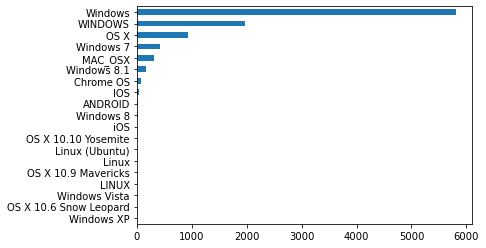

In [85]:
df['Operating System'].value_counts().sort_values().plot(kind='barh')

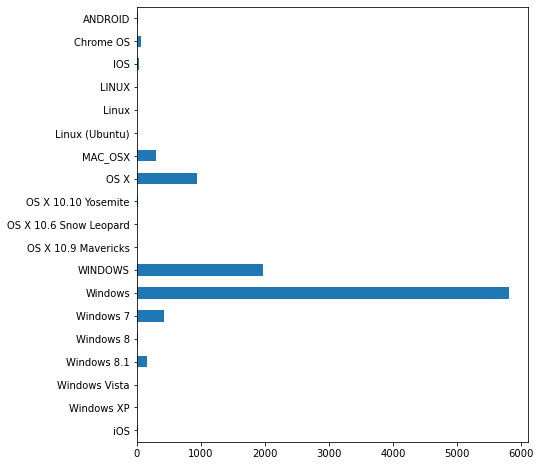

In [119]:
df['Operating System'].value_counts().sort_index(ascending=False).plot(kind='barh',figsize=(7,8))

In [87]:
os_dist = df['Operating System'].value_counts()

In [90]:
for val in os_dist:
    print(val)

5808
1963
938
421
303
164
68
31
22
20
10
9
7
6
5
4
3
2
1


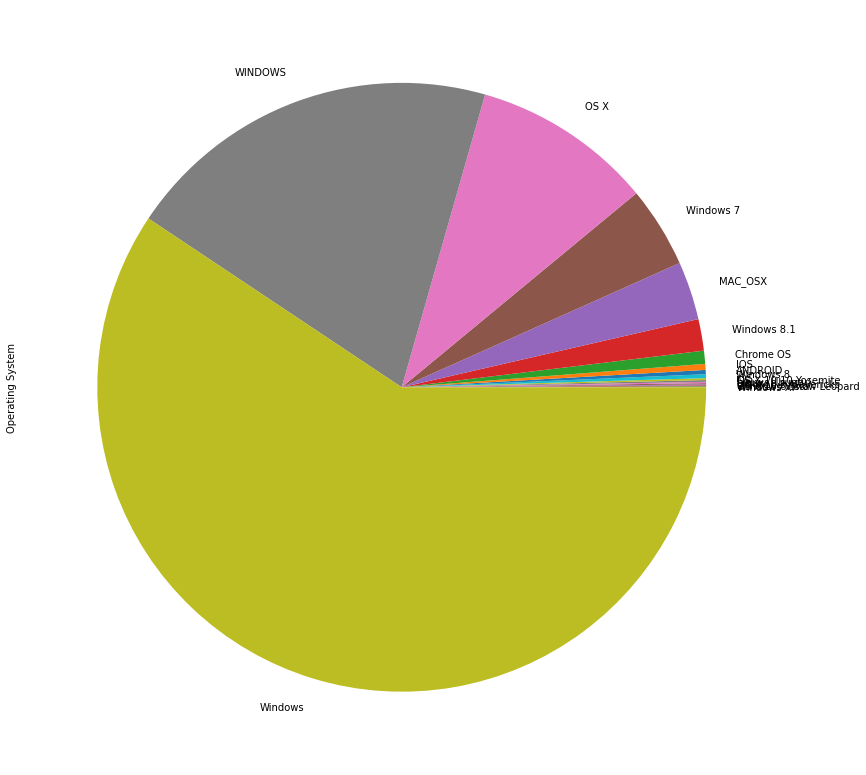

In [111]:
os_dist.sort_values().plot(kind='pie', figsize=(14,14))

In [ ]:
## TODO: Combine OS Systems to a Simpler Table